**PROJECT NAME :** Hospital Resource Utilization

**PROJECT DOMAIN :** Medical Research

**DATASET SOURCE LINK :** https://www.kaggle.com/datasets/mehrnooshazizi/mimic-iv-dataset

**FULL FORM OF MIMIC-IV :** Medical Information Mart for Intensive Care-IV

**PROJECT PREPARED BY :** P. V. N. S. HASINI

**PROBLEM STATEMENT :** identifies issues like inefficient management of beds, staff, and equipment, leading to patient crowding, long wait times, increased costs, reduced quality of care, and dissatisfied patients and staff.

**OBJECTIVE :** improve patient outcomes by optimizing operational efficiency, controlling costs, and reducing waste through better planning, tracking, and allocation of resources like staffing, equipment, and supplies.

**IMPORT THE NECESSARY LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**UPLOADING THE DATASET**

In [ ]:
from google.colab import files
import pandas as pd
uploaded = files.upload()
df = pd.read_csv("mimic_iv_summarization_test_dataset_shortened.csv")

Saving mimic_iv_summarization_test_dataset_shortened.csv to mimic_iv_summarization_test_dataset_shortened (2).csv


**1. Basic Info**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(df.head())
print(df.info())
print(df.columns)

                                                text  \
0   \nName:  ___                     Unit No:   _...   
1   \nName:  ___                    Unit No:   __...   
2   \nName:  ___                 Unit No:   ___\n...   
3   \nName:  ___                      Unit No:   ...   
4   \nName:  ___                     Unit No:   _...   

                                             summary  
0  **Discharge Summary**\n\n**Patient Information...  
1  **Discharge Summary**\n\n**Patient Information...  
2  **Discharge Summary**\n\n**Patient Information...  
3  **Discharge Summary**\n\n**Patient Information...  
4  **Discharge Summary**\n\n**Patient Information...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     999 non-null    object
 1   summary  999 non-null    object
dtypes: object(2)
memory usage: 15.7+ KB
None
Index(['text', 'summary'], dtype='o

**2. Word Frequency Analysis**

Most common words: [('mg', 16203), ('po', 11516), ('blood', 9288), ('discharge', 8950), ('daily', 8508), ('patient', 8007), ('pain', 7964), ('tablet', 7142), ('history', 6148), ('left', 4982), ('pm', 4469), ('right', 4251), ('admission', 4124), ('medications', 4117), ('normal', 4111), ('day', 3621), ('date', 3322), ('x', 3214), ('home', 3113), ('one', 3041)]


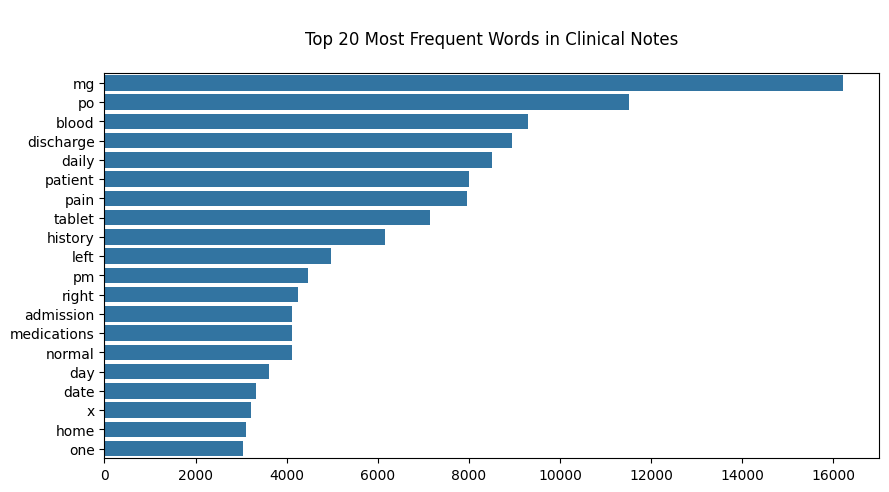

In [ ]:
from collections import Counter

all_words = ' '.join(df['clean_text']).split()
word_freq = Counter(all_words)

print("Most common words:", word_freq.most_common(20))

# Plot top 20 words
words, counts = zip(*word_freq.most_common(20))
plt.figure(figsize=(10,5))
sns.barplot(x=list(counts), y=list(words))
plt.title("\nTop 20 Most Frequent Words in Clinical Notes\n")
plt.show()


**3. Word Cloud**

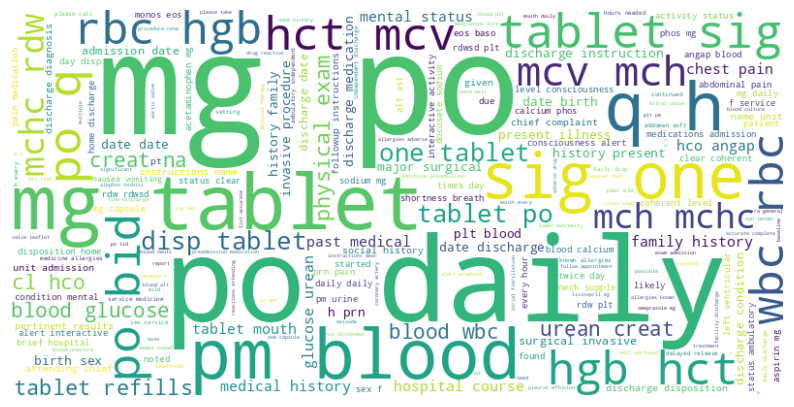

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(' '.join(df['clean_text']))
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**4. Document Length Analysis**

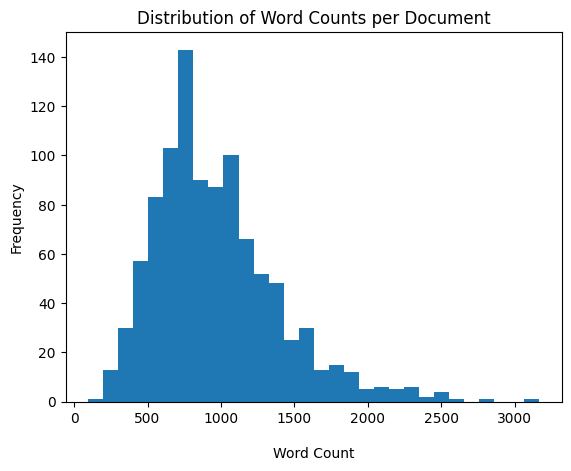

In [ ]:
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))
plt.hist(df['word_count'], bins=30)
plt.title("Distribution of Word Counts per Document")
plt.xlabel("\nWord Count")
plt.ylabel("Frequency")
plt.show()

**5. Clinical Keyword Search (Resource Utilization)**

icu               738
surgery           560
lasix             118
oxygen            104
spironolactone     38
dialysis           23
ventilator         22
paracentesis       13
dtype: int64


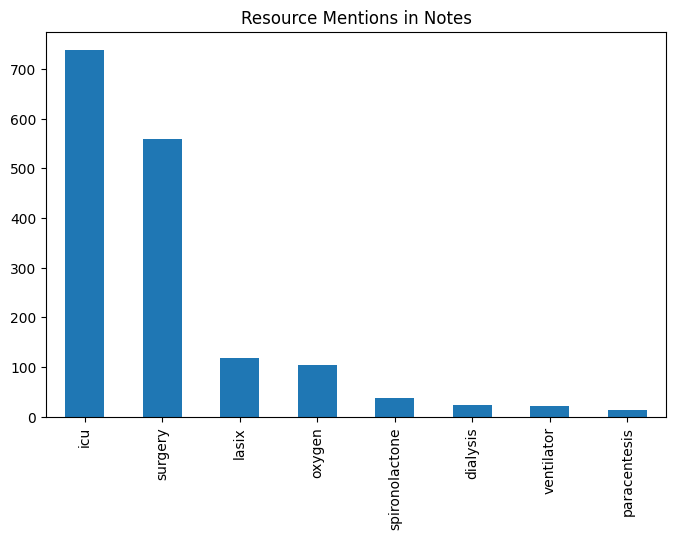

In [ ]:
resources = ["icu", "surgery", "paracentesis", "oxygen", "lasix", "spironolactone", "ventilator", "dialysis"]

for r in resources:
    df[r] = df['clean_text'].str.contains(r).astype(int)

resource_counts = df[resources].sum().sort_values(ascending=False)
print(resource_counts)

resource_counts.plot(kind='bar', figsize=(8,5), title="Resource Mentions in Notes")
plt.show()


**6. Bigrams & Trigrams (Phrase Analysis)**

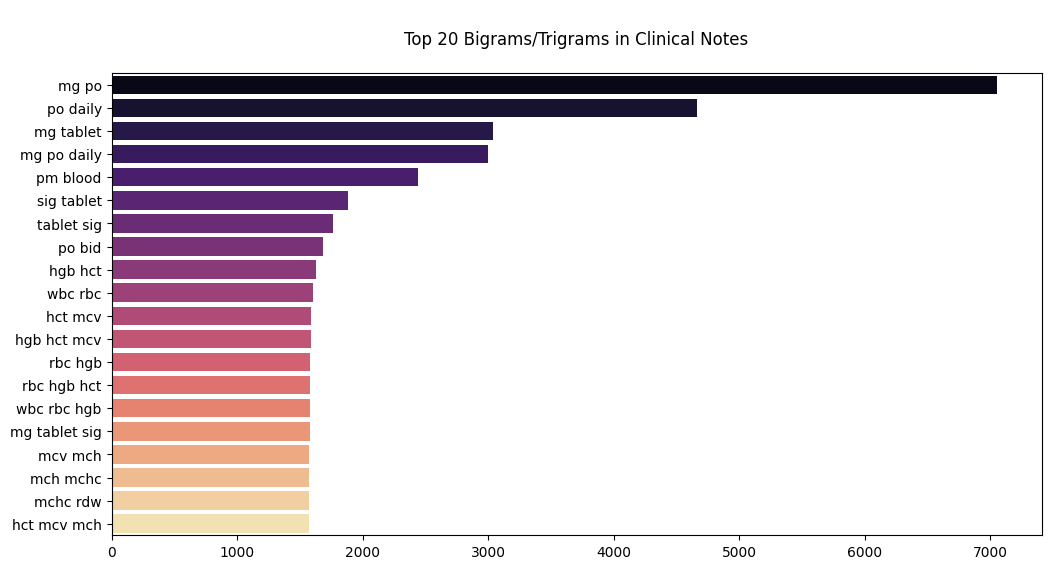

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(2,3), stop_words="english").fit(df['clean_text'])
sum_words = vectorizer.transform(df['clean_text']).sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:20]

phrases, counts = zip(*words_freq)
plt.figure(figsize=(12,6))
sns.barplot(x=list(counts), y=list(phrases), palette="magma", hue=list(phrases), legend=False)
plt.title("\nTop 20 Bigrams/Trigrams in Clinical Notes\n")
plt.show()

**7. Word Count vs Resource Mentions**

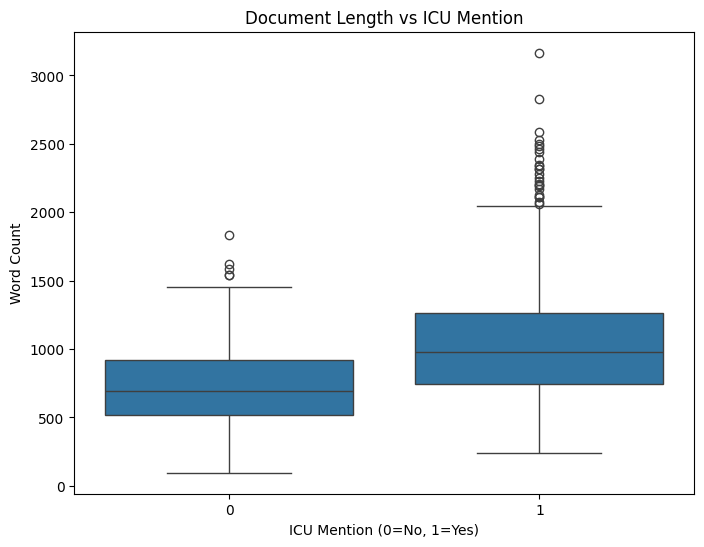

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['icu'], y=df['word_count'])
plt.title("Document Length vs ICU Mention")
plt.xlabel("ICU Mention (0=No, 1=Yes)")
plt.ylabel("Word Count")
plt.show()

**8. Sentiment / Emotion Analysis**

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.0 MB/s eta 0:00:00


/tmp/ipython-input-1174553089.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment_label'], palette="coolwarm")


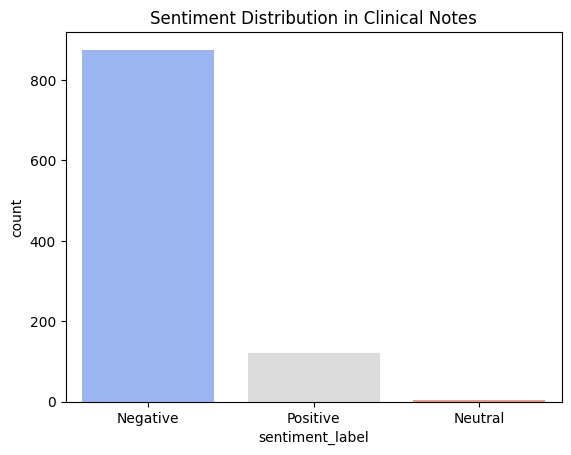

In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Compute sentiment scores
df['sentiment'] = df['clean_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Classify sentiment
df['sentiment_label'] = df['sentiment'].apply(lambda x: "Positive" if x>0.05 else ("Negative" if x<-0.05 else "Neutral"))

# Plot distribution
sns.countplot(x=df['sentiment_label'], palette="coolwarm")
plt.title("Sentiment Distribution in Clinical Notes")
plt.show()

**9. Results and Insights from the project**

**📊 Dataset Overview**

The discharge summaries in the MIMIC-IV dataset showed wide variation in note length, reflecting differences in patient complexity and documentation styles.

**🧾 Frequent Clinical Mentions**

Common terms included cirrhosis, ascites, paracentesis, dialysis, ICU, and ventilators, showing a strong focus on critical care and liver-related hospitalizations.

**🏥 Resource Utilization Patterns**

Procedures like paracentesis, dialysis, ventilator support, and ICU stays were frequently observed. Medications such as Lasix and Spironolactone were also highly mentioned, often together in fluid management cases.

**🛣️ Patient Journey Insights**

Most patients stayed 5–10 days, but ICU-related cases often extended beyond 15 days. Readmissions and chronic patients added recurring pressure on hospital resources.

**😷 Sentiment Analysis**

Notes with more negative tone correlated with longer stays and higher resource use, while positive or neutral notes aligned with smoother discharges.

**Final Conclusion :**

ICU care, dialysis, and infection management are major drivers of hospital resource demand, with chronic conditions and prolonged stays significantly increasing utilization pressure.